In [35]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split

In [36]:
df=pd.read_csv("breast_cancer.csv")
df

,Sample code number,Clump Thickness,Uniformity of Cell Size,Uniformity of Cell Shape,Marginal Adhesion,Single Epithelial Cell Size,Bare Nuclei,Bland Chromatin,Normal Nucleoli,Mitoses,Class
0,1000025,5,1,1,1,2,1,3,1,1,2
1,1002945,5,4,4,5,7,10,3,2,1,2
2,1015425,3,1,1,1,2,2,3,1,1,2
3,1016277,6,8,8,1,3,4,3,7,1,2
4,1017023,4,1,1,3,2,1,3,1,1,2
...,...,...,...,...,...,...,...,...,...,...,...
678,776715,3,1,1,1,3,2,1,1,1,2
679,841769,2,1,1,1,2,1,1,1,1,2
680,888820,5,10,10,3,7,3,8,10,2,4
681,897471,4,8,6,4,3,4,10,6,1,4


In [37]:
print(df.isnull().sum())
unique=0
l=[]
for i in df.iloc[:,-1].values:
    if(i in l):
        continue
    else:
        l.append(i)
        unique+=1
print(unique)

Sample code number             0
Clump Thickness                0
Uniformity of Cell Size        0
Uniformity of Cell Shape       0
Marginal Adhesion              0
Single Epithelial Cell Size    0
Bare Nuclei                    0
Bland Chromatin                0
Normal Nucleoli                0
Mitoses                        0
Class                          0
dtype: int64
2


### There are 0 missing variables in our dataset , thus no need for Imputing.
### There is just 2 unique result. hence it is a binary classification problem
### From data it is clear that sample id is obviously not an independant value
### Thus we can remove it.


In [11]:
df=df.iloc[:,1:]

In [13]:
df.head(0)

,Clump Thickness,Uniformity of Cell Size,Uniformity of Cell Shape,Marginal Adhesion,Single Epithelial Cell Size,Bare Nuclei,Bland Chromatin,Normal Nucleoli,Mitoses,Class


<AxesSubplot:>

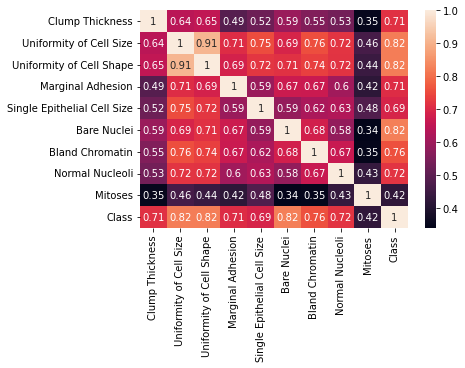

In [15]:
import seaborn as sns
corr=df.corr()
sns.heatmap(corr,annot=True)

### We can see the correlation is quite moderate only. hence we can proceed to check VIF for Logistic Regression

In [38]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
X=df.iloc[:,:-1]
vif_data = pd.DataFrame()
vif_data["feature"] = X.columns

vif_data["VIF"] = [variance_inflation_factor(X.values, i)
                        for i in range(len(X.columns))]

print(vif_data)


                       feature        VIF
0           Sample code number   2.413060
1              Clump Thickness   5.737438
2      Uniformity of Cell Size  14.253599
3     Uniformity of Cell Shape  14.131769
4            Marginal Adhesion   4.874432
5  Single Epithelial Cell Size   7.300780
6                  Bare Nuclei   5.076451
7              Bland Chromatin   7.925914
8              Normal Nucleoli   4.558061
9                      Mitoses   2.570986


### From Heatmap and VIF, it is pretty evident that Uniformity of cell size and shape have similar effect on the dataset . hence we can remove it to reduce redundancy

In [39]:
df=df.drop('Uniformity of Cell Shape',axis=1)

In [40]:
X=df.iloc[:,:-1]
vif_data = pd.DataFrame()
vif_data["feature"] = X.columns

vif_data["VIF"] = [variance_inflation_factor(X.values, i)
                        for i in range(len(X.columns))]

print(vif_data)

                       feature       VIF
0           Sample code number  2.413053
1              Clump Thickness  5.633879
2      Uniformity of Cell Size  8.341419
3            Marginal Adhesion  4.872040
4  Single Epithelial Cell Size  7.272752
5                  Bare Nuclei  4.913745
6              Bland Chromatin  7.915228
7              Normal Nucleoli  4.462780
8                      Mitoses  2.570986


<AxesSubplot:>

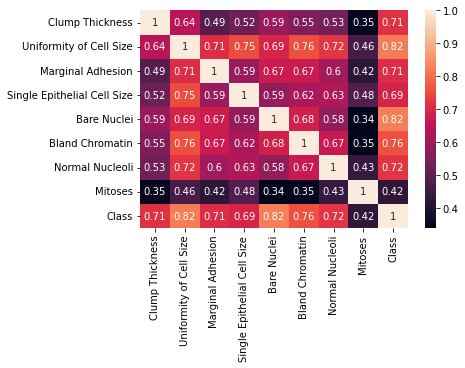

In [23]:
import seaborn as sns
corr=df.corr()
sns.heatmap(corr,annot=True)

### All the values have acceptable VIF and heatmap looks good.
### Can apply Logistic Regression now

In [24]:
x=df.iloc[:,:-1].values
y=df.iloc[:,-1:].values

In [25]:
enc=LabelEncoder()
y=enc.fit_transform(y)


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\preprocessing\_label.py:115: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [41]:
from sklearn.linear_model import LogisticRegression

In [42]:
clasr=LogisticRegression()

In [43]:
s=0
iterations=1000
for i in range(0,iterations):
    x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2)
    clasr.fit(x_train,y_train)
    s+=clasr.score(x_test,y_test)
print(s/iterations)

0.9676058394160537


### Model is thus evaluated and it is found to be be 96.7% accurate which serves as a good screening preliminary test for breast cancer detection